<h1><center>SHIPPING ANALYSIS</center></h1>

## Objective

- What is overall sales trend?
- What are the top 10 products by sales?
- What are the most selling products?
- Which is the most preferred ship mode?
- Which are the most prefereable category and sub-category?
   

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
sales_analysis = pd.read_excel("superstore_sales.xlsx")

In [7]:
sales_analysis

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [5]:
# Shape
sales_analysis.shape

(51290, 21)

In [8]:
# Columns
sales_analysis.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [10]:
# Info
sales_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [15]:
# NaN
sales_analysis.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [17]:
# Statistical summary
sales_analysis.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


#### Question #1: What is overall sales trend?

In [18]:
sales_analysis.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [20]:
sales_analysis["order_date"].min(), sales_analysis["order_date"].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [21]:
# Data is from 2011- 2014

In [26]:
sales_analysis["month_year"]  = sales_analysis["order_date"].apply(lambda x: x.strftime("%Y-%m"))

In [27]:
sales_analysis["month_year"]

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: month_year, Length: 51290, dtype: object

In [28]:
backup = sales_analysis.copy()

In [29]:
sales_analysis.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [30]:
trend = sales_analysis.groupby("month_year").sum()

In [32]:
trend.head()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
2011-01,98898.48886,1463,68.758,8321.80096,10544.7880,870763
2011-02,91152.15698,1224,52.252,12417.90698,10681.1630,760158
2011-03,145729.36736,1836,74.212,15303.56826,13096.1855,1083929
2011-04,116915.76418,2020,80.782,12902.32438,12954.5200,1134204
2011-05,146747.83610,2013,82.382,12183.82870,16443.2060,1138226


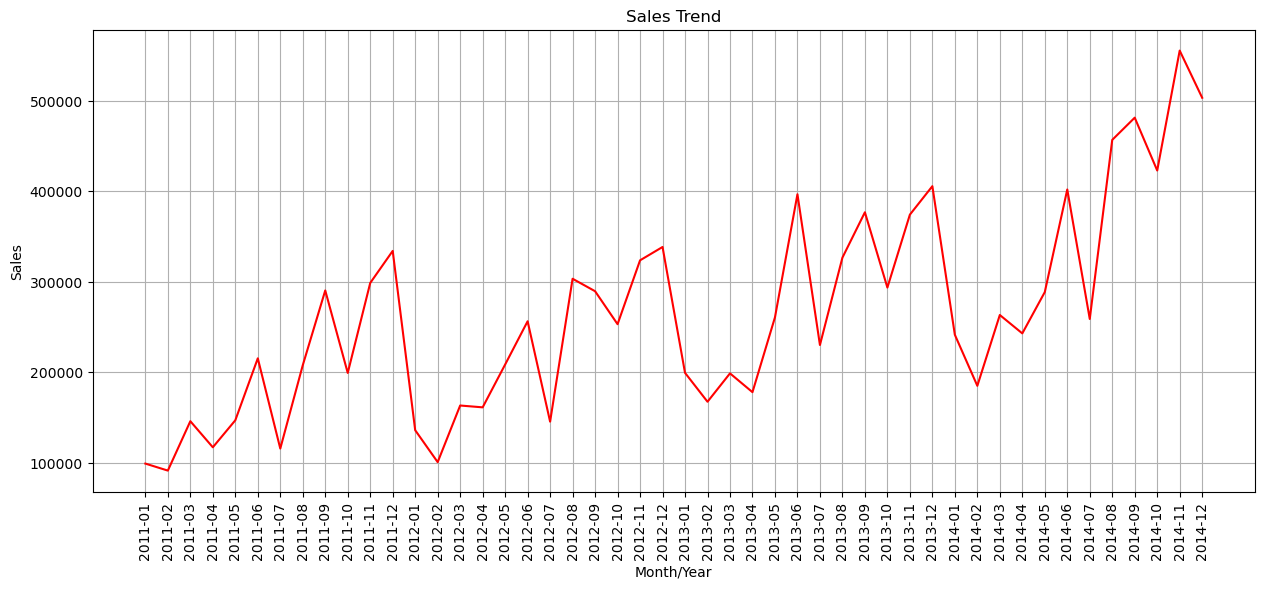

In [41]:
x = trend.index.values
y = trend["sales"]
plt.figure(figsize = (15,6))
plt.plot(x,y, color = "red")

plt.title("Sales Trend")
plt.grid()
plt.xlabel("Month/Year")
plt.ylabel("Sales")
plt.xticks(rotation = "vertical")
plt.show()

#### Question #2: - What are the top 10 products by sales?

In [42]:
sales_analysis.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [44]:
sales_analysis["net_sales"] = sales_analysis["sales"] * sales_analysis["quantity"]

In [65]:
top_product = sales_analysis.groupby("product_name").sum()

In [66]:
top_product = top_product["sales"].reset_index()

In [67]:
top_product

,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
3784,iOttie HLCRIO102 Car Mount,215.892
3785,iOttie XL Car Mount,223.888
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [68]:
top_product.sort_values("sales", ascending=False, inplace=True)

In [69]:
top_product.head(10)

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


#### Question #3: What are the most selling products?

In [70]:
sales_analysis.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year,net_sales
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01,816.600
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01,361.098
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01,264.480
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01,134.595
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01,568.350


In [107]:
most_sold = pd.DataFrame(sales_analysis.groupby("product_name").sum()["quantity"])

In [108]:
most_sold.sort_values("quantity", ascending=False, inplace=True)

In [109]:
most_sold.head(10)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


#### Question #4: Which is the most preferred ship mode?

In [110]:
sales_analysis.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year,net_sales
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01,816.600
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01,361.098
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01,264.480
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01,134.595
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01,568.350


In [111]:
ship_mode = sales_analysis.copy()

In [113]:
ship_mode["count"] = 1

In [114]:
ship_mode = pd.DataFrame(ship_mode.groupby("ship_mode").count()["count"])

In [115]:
ship_mode

,count
ship_mode,
First Class,7505
Same Day,2701
Second Class,10309
Standard Class,30775


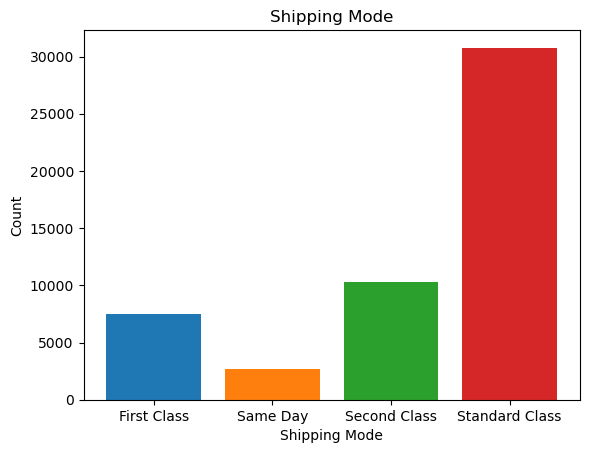

In [127]:
x = ship_mode.index.values
y = ship_mode["count"]
plt.bar(x,y, color=["tab:blue","tab:orange","tab:green","tab:red"])

plt.title("Shipping Mode")
plt.ylabel("Count")
plt.xlabel("Shipping Mode")
plt.show()

#### Question #5: Which are the most prefereable category and sub-category?

In [128]:
sales_analysis.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'month_year', 'net_sales'],
      dtype='object')

In [131]:
category = pd.DataFrame(sales_analysis.groupby(["category","sub_category"]).sum()["profit"])

In [132]:
category.sort_values(["category","profit"], ascending=False, inplace=True)

In [133]:
category

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870